In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2
from scipy import optimize

### Introduction

In this exercise, we will make a confidence region with coverage $1-\alpha$, $\alpha \in (0,1)$, for both parameters, the mean $\mu \in (-\infty, \infty)$ and the variance $\sigma^2 > 0$, of the normal distribution.

Let $X = (X_1, \ldots, X_n)$ be a random sample from the distribution  $N(\mu,\sigma^2)$. Also, we use the estimators
$$ \hat{\mu} = \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i $$
and
$$S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i- \bar{X})^2,$$
which are the sample mean and sample variance, respectively.

We assume the objective is to construct a confidence region $C(X)$ with coverage $1 - \alpha$ for the parameter $\theta = (\mu, \sigma^2)$. The confidence region $C(X)$ is a function of $\hat{\theta} = (\bar{X}, S^2)$. 

It is well known that the sample mean and sample variance are independent, and that 
\begin{align*}
    \frac{(n-1)S^2}{\sigma^2} &\thicksim \chi^2(n-1),    \\
    \frac{\sqrt{n}(\bar{X} - \mu)}{\sigma} &\thicksim N(0,1),
\end{align*}
where $\chi^2$ is the Chi-Squared distribution with $n-1$ degrees of freedom. So, we have that
$$P\left(  -c_{\alpha} \leq \frac{\sqrt{n}(\bar{X} - \mu)}{\sigma} \leq c_{\alpha} \right) = \sqrt{1-\alpha}, $$
where $c_{\alpha} = \Phi^{-1}(\cdot) ([1 + \sqrt{1-\alpha}]/2)$ and $\Phi$ is the distribution function for a normal standard random variable. Similarly, we have 
$$P\left(  c'_{1\alpha} \leq \frac{(n-1)S^2}{\sigma^2} \leq c'_{2\alpha} \right) = \sqrt{1-\alpha},$$
for some constant numbers $c'_{1\alpha}$ and $c'_{2\alpha}$.

By independence of the sample mean and sample variance, we know that
$$P\left(-c_{\alpha} \leq \frac{\sqrt{n}(\bar{X} - \mu)}{\sigma} \leq c_{\alpha} , c'_{1\alpha} \leq \frac{(n-1)S^2}{\sigma^2} \leq c'_{2\alpha} \right) = 1-\alpha,$$
that is,
\begin{equation} \label{CCII_Normal_2_Params}
    P \left( \frac{n ( \bar{X} - \mu)^2}{ c_{\alpha}^2 } \leq \sigma^2 , \frac{(n-1)S^2}{c'_{2\alpha} } \leq \sigma^2 \leq \frac{(n-1)S^2}{c'_{2\alpha}} \right) = 1-\alpha.
\end{equation}
The last equation defines a confidence set for $\theta$ with coverage $1-\alpha$.

### Code

For the exercise, first, we simulate a random dataset.

In [2]:
np.random.seed(7)
    
mu, sigma = 0, 0.1 # mean and standard deviation (postive square root of variance)
n         = 100    # sample size
muestra = np.random.normal(mu, sigma, n) # simulate the data

Text(0, 0.5, '$X_i$')

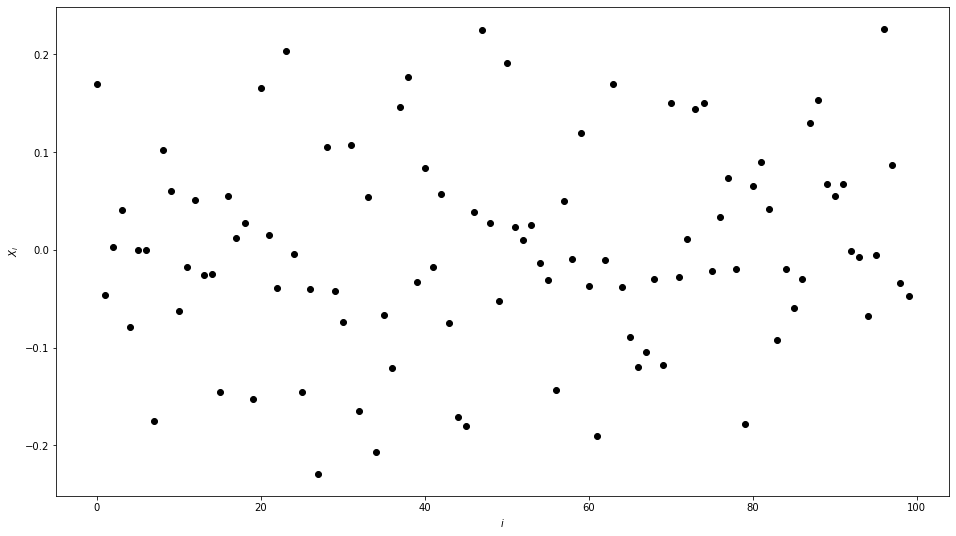

In [3]:
# 1-dimensional scatterplot of the generated sample
plt.figure(figsize=(16,9))
plt.plot(muestra, 'ko')
plt.xlabel(r'$i$')
plt.ylabel(r'$X_i$')

In [21]:
# estimates of the population parameteres, they are really close to the actual values
mu_hat = muestra.mean()
s      = muestra.std()

print('Estimate for the mean: $\\bar{X}$' + str(round(mu_hat,4)))
print('Estimate for the variance: ' + str(round(round(s**2,4),4)))

Estimate for the mean: $\bar{X}$0.0012
Estimate for the variance: 0.0104


In [5]:
# Set coverage to be 0.95
alpha = 0.05

In [6]:
# Find the appropiate constants for the confidence set

##! This was done manually but can be automated to give the values c'_j, j = 1,2.
c_mu  = norm.ppf((1+(1-alpha)**(1/2))/2)
c_tilde_1 = 64
c_tilde_2 = 200

# Check for appropiate (1-alpha)**(1-2) probability
chi2.cdf(c_tilde_2, n-1) - chi2.cdf(c_tilde_1, n-1)

0.9975412814068552

In [7]:
# Find the limits of the set for s
s_cota_1 = (n-1)*s**2/c_tilde_1
s_cota_2 = (n-1)*s**2/c_tilde_2

In [8]:
# vectors to compute the curve of the confidence region
mu_u  = np.linspace(-0.1, 0.1,  6*n)
var_u = np.linspace(0,    0.02, 6*n)
var_curva = n*(mu_hat - mu_u)**2/c_mu
df_valores = pd.DataFrame([mu_u, var_curva]).T

In [9]:
# define functions to find the extremes for coloring the region
def variance_curve_l1(mu_space):
    return(n*(mu_hat - mu_space )**2/c_mu - s_cota_1)

def variance_curve_l2(mu_space):
    return(n*(mu_hat - mu_space )**2/c_mu - s_cota_2)

In [10]:
# find the extremes for coloring the region
sol_l1 = optimize.root(variance_curve_l1, [0])
sol_l2 = optimize.root(variance_curve_l2, [0])

sol_r1 = optimize.root(variance_curve_l1, [1])
sol_r2 = optimize.root(variance_curve_l2, [1])

In [11]:
# vectors to plot the confidence region
mu_u_left  = np.linspace(sol_l1.x[0], sol_l2.x[0],  int(n/3))
mu_u_right = np.linspace(sol_r1.x[0], sol_r2.x[0],  int(n/3))

var_curva_left  = n*(mu_hat - mu_u_left )**2/c_mu
var_curva_right = n*(mu_hat - mu_u_right)**2/c_mu

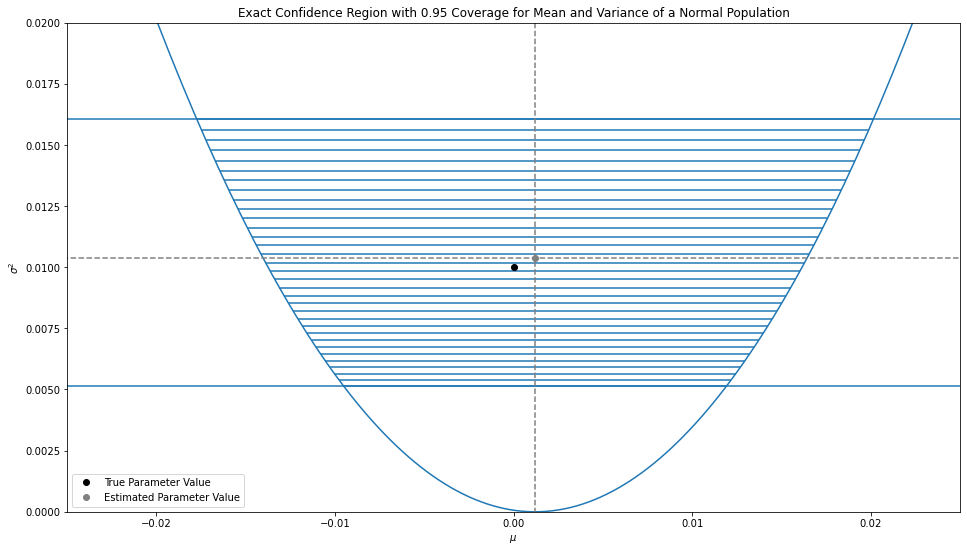

In [12]:
# Plot of confidence region
plt.figure(figsize=(16,9))
plt.plot(mu_u, var_curva)
plt.hlines((n-1)*s**2/c_tilde_1, -0.1, 0.1)
plt.hlines((n-1)*s**2/c_tilde_2, -0.1, 0.1)
plt.hlines(var_curva_left, mu_u_left, mu_u_right)
plt.vlines(mu_hat, -.005, .025, linestyle='--', color='grey')
plt.hlines(s**2,   -.1  , .1,   linestyle='--', color='grey')

plt.plot(mu, sigma**2, 'ko', label='True Parameter Value')
plt.plot(mu_hat, s**2, 'o', color='grey', label='Estimated Parameter Value')

plt.ylim(0, 0.02)
plt.xlim(-0.025, 0.025)
plt.title('Exact Confidence Region with 0.95 Coverage for Mean and Variance of a Normal Population')
plt.xlabel('$\mu$')
plt.ylabel('$\sigma^2$')
plt.legend()

From the Introduction, we have two straight lines, given by $\sigma^2 = \frac{(n-1)S^2}{c_{j \alpha}}$, $j = 1,2$, and a curve $\sigma^2 = \frac{n(\bar{X}-\mu)^2}{c^2_{\alpha}}$ that define the exact confidence region. 

In our example, numerically, the values are:
$$\frac{(99)0.0103}{64} = 0.016; \frac{(99)0.0103}{200} = 0.005;$$
and
$$\frac{100(0.0012 -\mu)^2}{5},$$
which gives us the exact confidence region with coverage $0.95$ for $\theta$.

### Conclusion

We have seen how to construct a $1-\alpha$, with $\alpha = 0.05$ we have a coverage of $0.95$, exact confidence region for $\theta = (\mu, \sigma^2)$ in a Normal population. Also, we have simulated some data and constructed said exact confidence region. This code can be addapted for arbitrary coverage levels. 

Usually, confidence regions use approximations to the distribution of the statistics. This is not an approximate case, it gives us the exact probability coverage, given that the assumptions are satisfied (independence of observations and a normal population).